In [4]:
import pathlib
from at_synapse_detection import SynapseDetection as syn
from PIL import Image, ImageSequence
import numpy as np
from skimage import measure
import czifile

In [147]:
import cv2 as cv2

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
p = pathlib.Path('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE')

In [9]:
list(p.glob('*'))

[PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/.DS_Store'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080361'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/Move Distances for Salvo.xlsx'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080400'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080250'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/Fiduciares_361_400.pptx'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080188'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080334'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080284'),
 PosixPath('/Volumes/seeley_micro_jpx/Confocal Synapses Images_T

In [36]:
airyscan_two_two = list(two_two.glob('*Airyscan*'))
airyscan_two_two = [f.as_posix() for f in airyscan_two_two if 'INS' in f.as_posix()]
for item in airyscan_two_two:
    print(item)

/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS13_x60.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS12_x60.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS12_x60_Airyscan ProcessingStrenght7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS13_x60_Airyscan ProcessingStrenght7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS11_x60.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080202/S16080202_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS11_x60_Airyscan ProcessingStrenght7.czi


In [54]:
def get_airyscans_from_id(PATH, pid, tissue, verbose=False):
    patient_data = next(PATH.glob(f'*{pid}*'))
    tissue_data = [f.as_posix() for f in patient_data.glob(f'*{tissue}*Processing*')]
    if verbose is True:
        for item in tissue_data:
            print(item)
    return tissue_data

In [55]:
get_airyscans_from_id(p, 'S16080308', 'INS', verbose=True)

/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS17_x60_Airyscan ProcessingStrenght7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS19_x60_Airyscan ProcessingStrenght7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS18_x60_Airyscan ProcessingStrenght7.czi


['/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS17_x60_Airyscan ProcessingStrenght7.czi',
 '/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS19_x60_Airyscan ProcessingStrenght7.czi',
 '/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080308/S16080308_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS18_x60_Airyscan ProcessingStrenght7.czi']

In [133]:
subject_data = get_airyscans_from_id(p, '334', 'INS', verbose=True)

/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080334/S16080334_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS10_x60_Airyscan ProcessingStrenght7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080334/S16080334_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS8_x60_Airyscan Processing-Strength7.czi
/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080334/S16080334_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS9_x60_Airyscan ProcessingsStrenght7.czi


In [134]:
single_insula = subject_data[0]; print(single_insula)

/Volumes/seeley_micro_jpx/Confocal Synapses Images_TC_GE/S16080334/S16080334_Synaptophysin-Spinophyllin_Airyscan_Z-stack_FOV_INS10_x60_Airyscan ProcessingStrenght7.czi


In [135]:
with czifile.CziFile(single_insula) as czi:
    image = czi.asarray()

/Users/ajlee/.local/lib/python3.6/site-packages/czifile/czifile.py:400: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[index] = tile


In [136]:
print(image.shape, image.dtype)

(1, 1, 2, 1, 48, 1508, 1508, 1) uint16


In [212]:
red_slice = image[0,0,0,0,24,:,:,0]
green_slice = image[0,0,1,0,24,:,:,0]

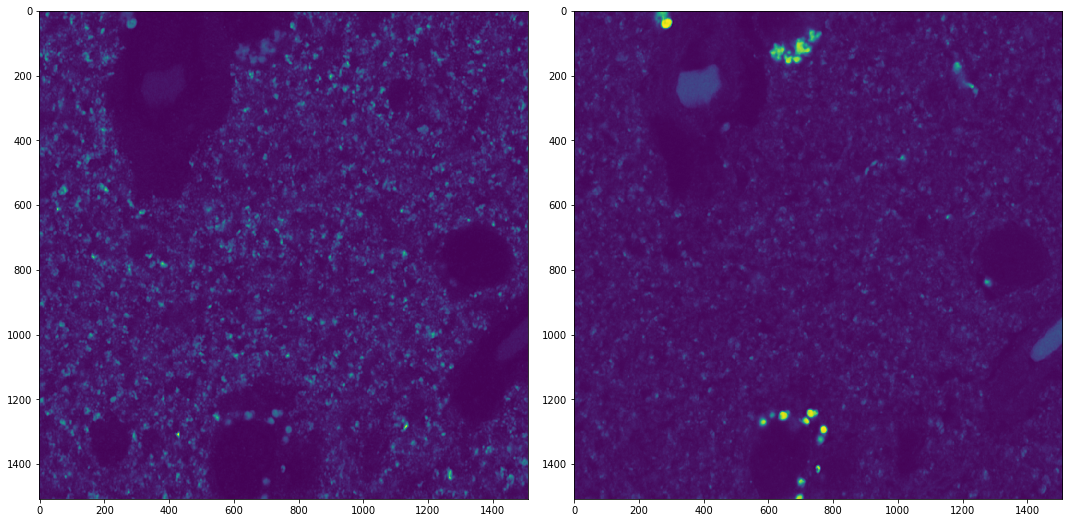

In [260]:
plot_flour([red_slice, green_slice], ['',''])

In [214]:
red_channel = image[0,0,0,0,:,:,:,0]
green_channel = image[0,0,1,0,:,:,:,0]

red_channel = np.swapaxes(np.swapaxes(red_channel, 0, 1), 1, 2)
green_channel = np.swapaxes(np.swapaxes(green_channel, 0, 1), 1, 2)

In [215]:
red_channel.shape

(1508, 1508, 48)

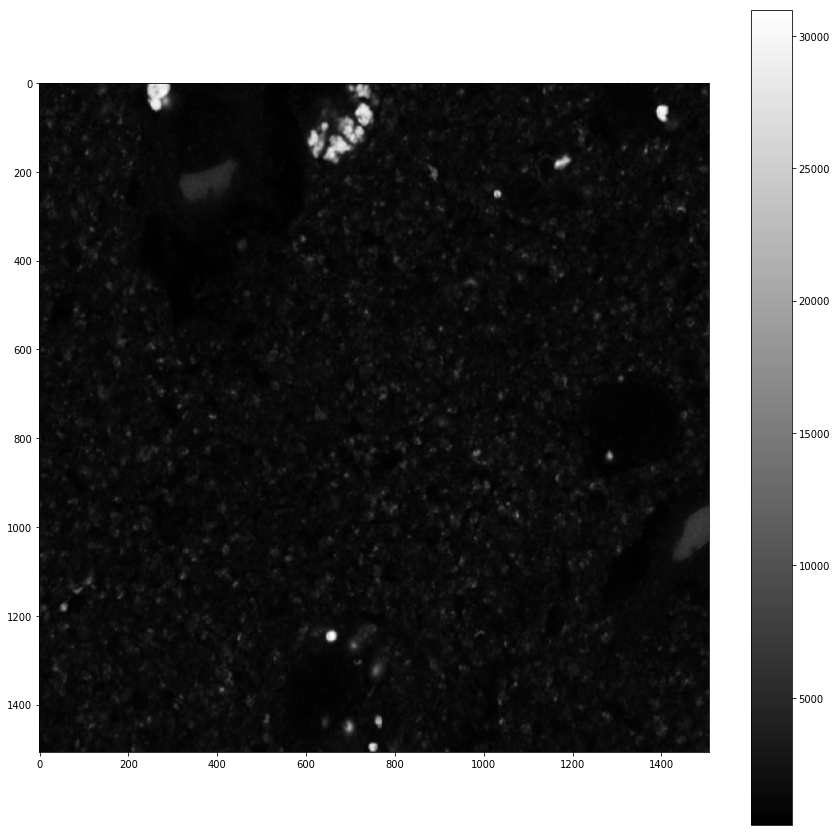

In [261]:
plt.figure(figsize=(15,15))
plt.imshow(green_channel[:,:,30], cmap='gray')
plt.colorbar()

In [217]:
synaptic_volumes = {'presynaptic': [red_channel.copy()], 'postsynaptic': [green_channel.copy()]}

In [218]:
min_num_of_slices = 1

In [219]:
query = {'preIF': ['red_channel'], 'preIF_z': [min_num_of_slices],
         'postIF': ['green_channel'], 'postIF_z': [min_num_of_slices],
         'punctumSize': 2}

In [220]:
resultVol = syn.getSynapseDetections(synaptic_volumes, query)

/Users/ajlee/.local/lib/python3.6/site-packages/at_synapse_detection/SynapseDetection.py:109: RuntimeWarning: divide by zero encountered in log
  vol = np.log(vol)


starting z ind: 0
starting z ind: 1
starting z ind: 2
starting z ind: 3
starting z ind: 4
starting z ind: 5
starting z ind: 6
starting z ind: 7
starting z ind: 8
starting z ind: 9
starting z ind: 10
starting z ind: 11
starting z ind: 12
starting z ind: 13
starting z ind: 14
starting z ind: 15
starting z ind: 16
starting z ind: 17
starting z ind: 18
starting z ind: 19
starting z ind: 20
starting z ind: 21
starting z ind: 22
starting z ind: 23
starting z ind: 24
starting z ind: 25
starting z ind: 26
starting z ind: 27
starting z ind: 28
starting z ind: 29
starting z ind: 30
starting z ind: 31
starting z ind: 32
starting z ind: 33
starting z ind: 34
starting z ind: 35
starting z ind: 36
starting z ind: 37
starting z ind: 38
starting z ind: 39
starting z ind: 40
starting z ind: 41
starting z ind: 42
starting z ind: 43
starting z ind: 44
starting z ind: 45
starting z ind: 46
starting z ind: 47


In [221]:
resultVol.shape

(1508, 1508, 48)

In [222]:
thresh = 0.9
label_vol = measure.label(resultVol > thresh)
stats = measure.regionprops(label_vol)

In [223]:
len(stats) # this doesn't look right..

5

In [233]:
#processed_green = synaptic_volumes['postIF']
processed_green = synaptic_volumes['presynaptic'][0]
processed_red = synaptic_volumes['postsynaptic'][0]
print(processed_green.shape)

(1508, 1508, 48)


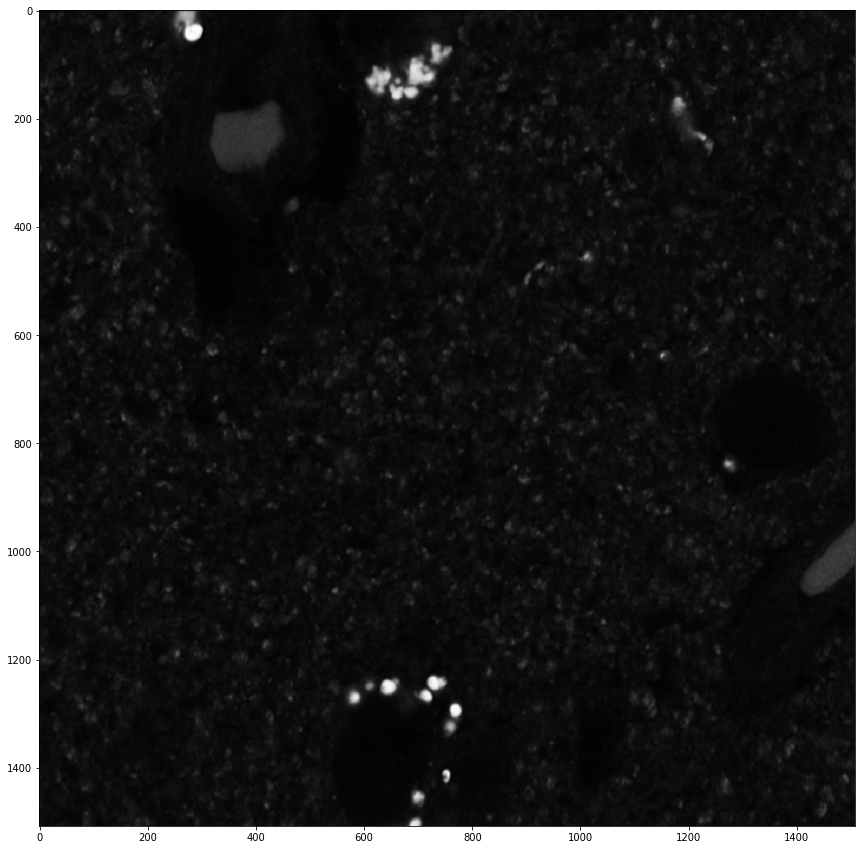

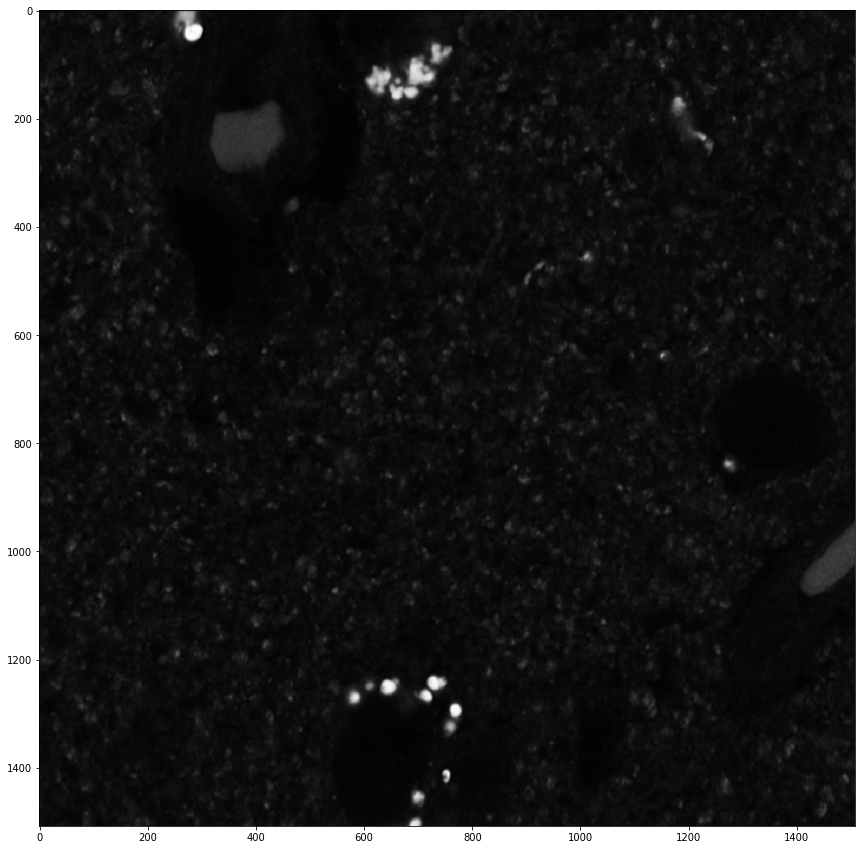

In [234]:
# original data

plt.figure(figsize=(15,15))
plt.imshow(green_channel[:,:,24], cmap='gray')
plt.figure(figsize=(15,15))
plt.imshow(measured_green[:,:,24], cmap='gray')

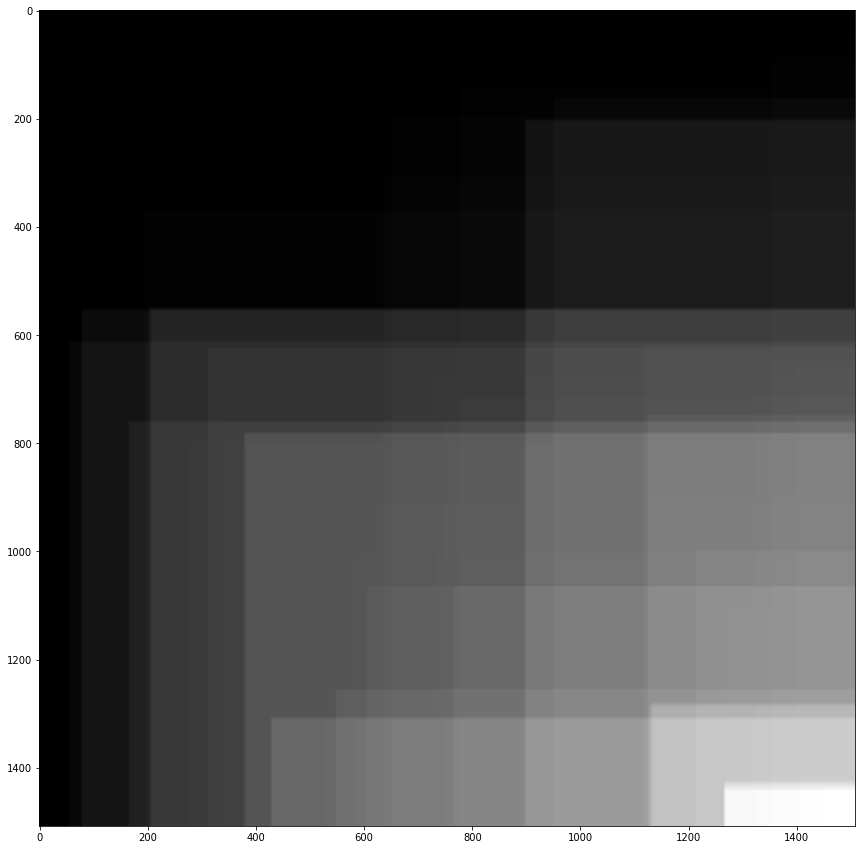

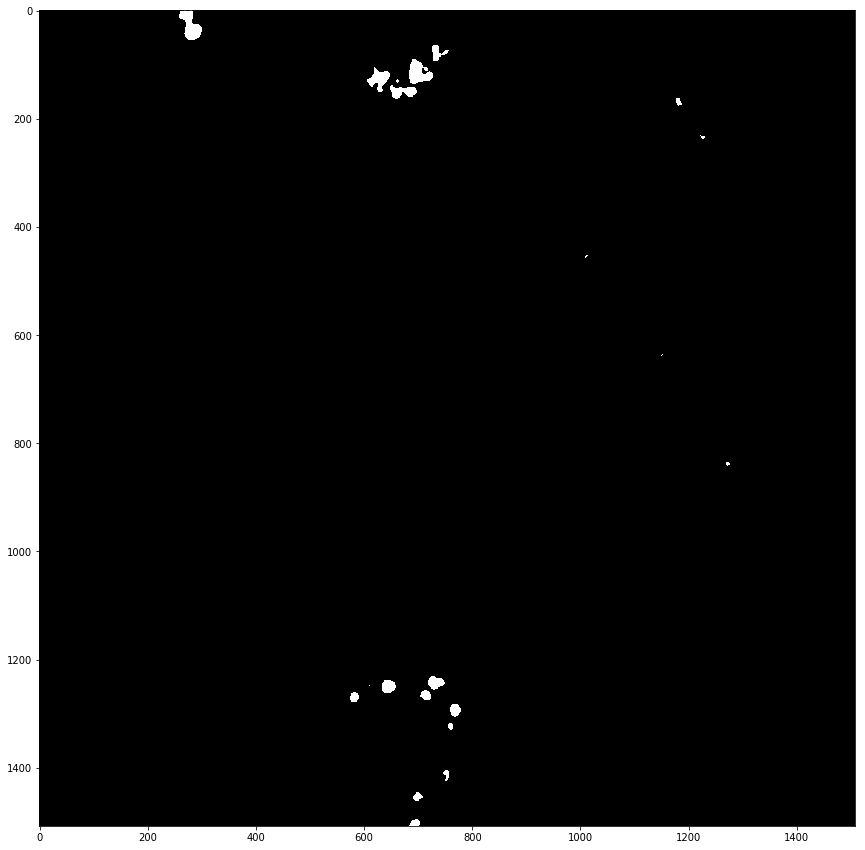

In [235]:
plt.figure(figsize=(15,15))
plt.imshow(processed_green[:,:,24], cmap='gray')
plt.figure(figsize=(15,15))
plt.imshow(processed_red[:,:,24], cmap='gray')

(array([7.997060e+05, 1.113397e+06, 2.415110e+05, 5.931300e+04,
        2.230500e+04, 1.062100e+04, 6.139000e+03, 4.168000e+03,
        2.784000e+03, 1.755000e+03, 1.241000e+03, 9.770000e+02,
        8.220000e+02, 6.920000e+02, 6.380000e+02, 5.500000e+02,
        5.430000e+02, 4.980000e+02, 5.130000e+02, 5.210000e+02,
        5.260000e+02, 4.630000e+02, 4.390000e+02, 3.790000e+02,
        3.870000e+02, 3.990000e+02, 3.160000e+02, 3.050000e+02,
        3.320000e+02, 2.810000e+02, 2.350000e+02, 2.150000e+02,
        1.930000e+02, 1.450000e+02, 1.180000e+02, 1.140000e+02,
        1.120000e+02, 1.500000e+02, 5.000000e+01, 2.700000e+01,
        2.500000e+01, 1.600000e+01, 2.500000e+01, 2.500000e+01,
        2.300000e+01, 1.200000e+01, 1.300000e+01, 1.400000e+01,
        1.400000e+01, 1.700000e+01]),
 array([   53.  ,   627.72,  1202.44,  1777.16,  2351.88,  2926.6 ,
         3501.32,  4076.04,  4650.76,  5225.48,  5800.2 ,  6374.92,
         6949.64,  7524.36,  8099.08,  8673.8 ,  9248.52, 

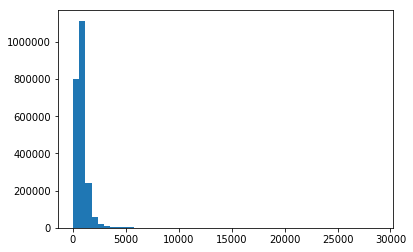

In [151]:
plt.hist(green_channel[:,:,40].ravel(), bins=50)

In [249]:
green_channel_step1 = syn.getProbMap(green_channel.copy())

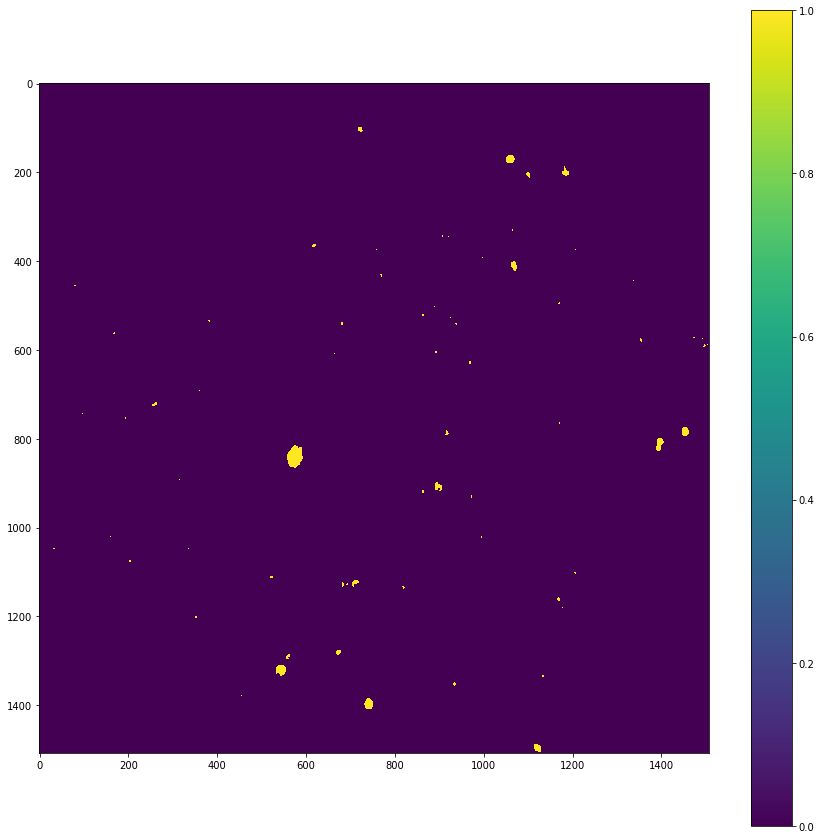

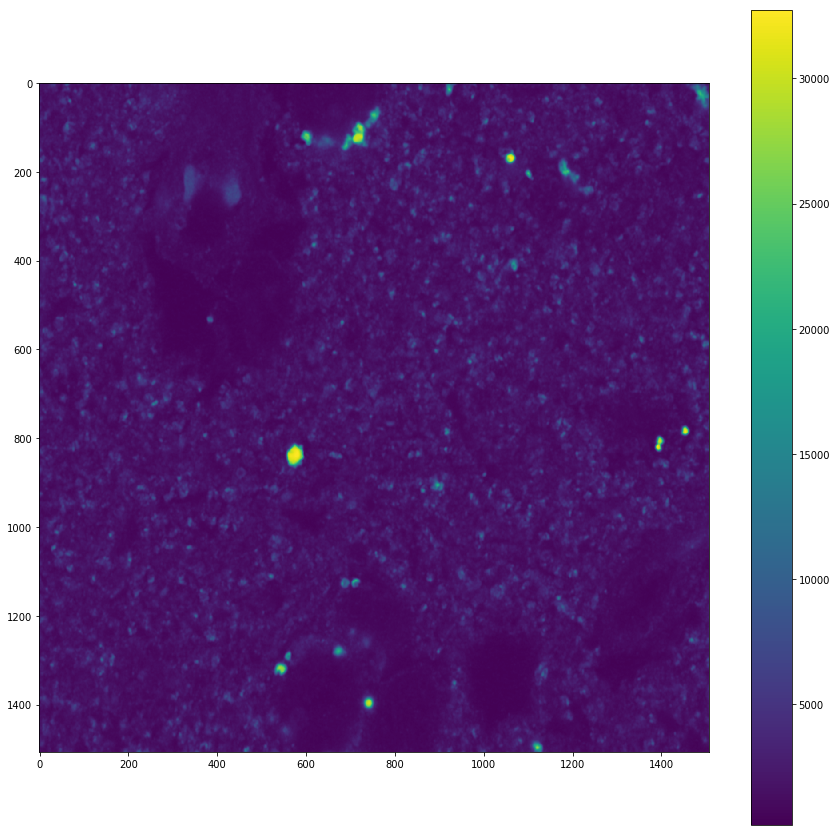

In [266]:
plt.figure(figsize=(15,15))
plt.imshow(green_channel_step1[:,:,15])
plt.colorbar()
plt.figure(figsize=(15,15))
plt.imshow(green_channel[:,:,15])
plt.colorbar()

In [268]:
green_channel_step2 = syn.convolveVolume(green_channel_step1.copy(), 2)

/Users/ajlee/.local/lib/python3.6/site-packages/at_synapse_detection/SynapseDetection.py:109: RuntimeWarning: divide by zero encountered in log
  vol = np.log(vol)


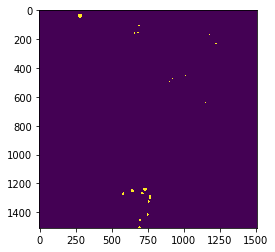

In [270]:
plt.imshow(green_channel_step2[:,:,24])